# Stocks Dataset- Time Series Forecasting through RNN

### Importing Data & Libraries

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DowJones.csv to DowJones.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dow_jones= pd.read_csv('DowJones.csv')
dow_jones.head()

,Date,Value
0,1977-09-02,872.31
1,1977-09-09,857.04
2,1977-09-16,856.81
3,1977-09-23,839.14
4,1977-09-30,847.11


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Nasdaq.csv to Nasdaq.csv


In [6]:
nasdaq= pd.read_csv('Nasdaq.csv')
nasdaq.head()

,Date,Value
0,1977-09-02,100.83
1,1977-09-09,100.91
2,1977-09-16,100.74
3,1977-09-23,99.57
4,1977-09-30,100.85


In [8]:
from google.colab import files
uploaded = files.upload()

Saving SP500.csv to SP500 (1).csv


In [9]:
sp= pd.read_csv('SP500.csv')
sp.head()

,Date,Value
0,1977-09-02,97.45
1,1977-09-09,96.37
2,1977-09-16,96.48
3,1977-09-23,95.04
4,1977-09-30,96.53


In [0]:
merge1= pd.merge(dow_jones,nasdaq,on='Date')
data=pd.merge(merge1,sp,on='Date')

In [0]:
data.columns=['Date','Dow Jones Value','NASDAQ','SP500']

In [12]:
data.head()

,Date,Dow Jones Value,NASDAQ,SP500
0,1977-09-02,872.31,100.83,97.45
1,1977-09-09,857.04,100.91,96.37
2,1977-09-16,856.81,100.74,96.48
3,1977-09-23,839.14,99.57,95.04
4,1977-09-30,847.11,100.85,96.53


In [13]:
data['Date']=pd.to_datetime(data['Date'])

data= data.groupby(['Date']).sum()

data.head()

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-02,872.31,100.83,97.45
1977-09-09,857.04,100.91,96.37
1977-09-16,856.81,100.74,96.48
1977-09-23,839.14,99.57,95.04
1977-09-30,847.11,100.85,96.53


In [14]:
#Weekly Sample
df=data.resample('W').sum()
df

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-04,872.31,100.8300,97.45
1977-09-11,857.04,100.9100,96.37
1977-09-18,856.81,100.7400,96.48
1977-09-25,839.14,99.5700,95.04
1977-10-02,847.11,100.8500,96.53
...,...,...,...
2017-08-06,22092.81,6351.5600,2476.83
2017-08-13,21858.32,6256.5600,2441.32
2017-08-20,21674.51,6216.5300,2425.55


### Visualizing the Time Series Data

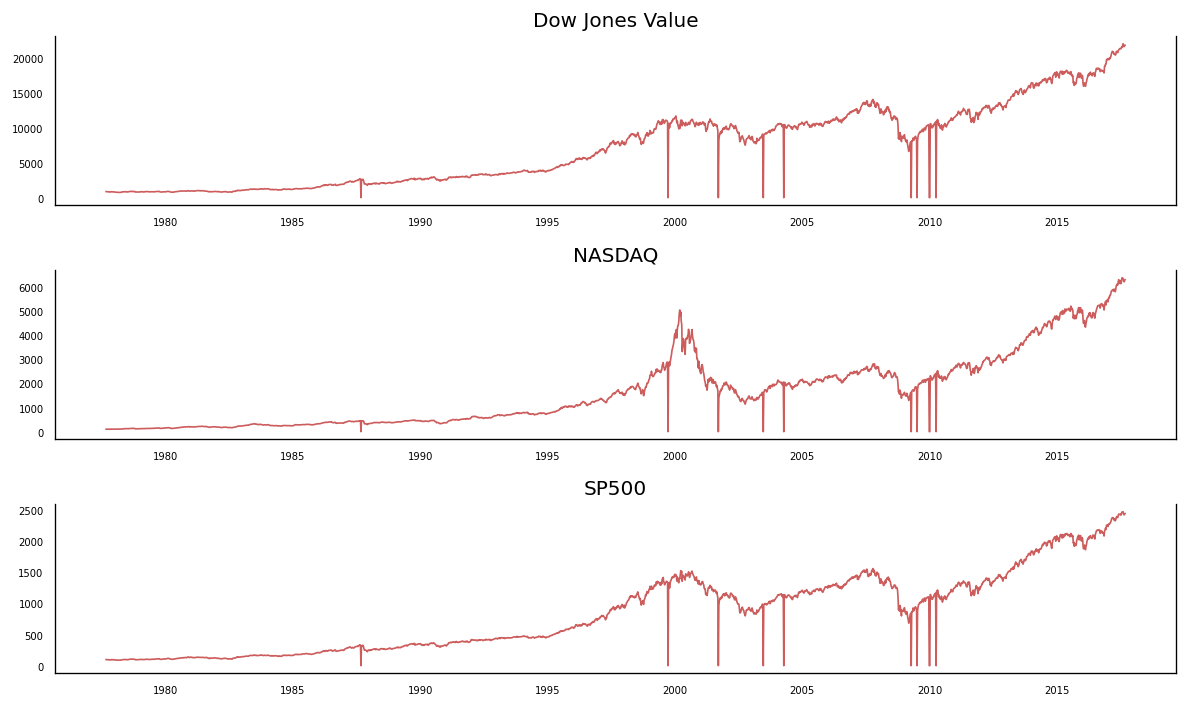

In [15]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='indianred', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

### Check for Stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Dow Jones Value" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.3093
 No. Lags Chosen       = 26
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.9967. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "NASDAQ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.8567
 No. Lags Chosen       = 26
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.9925. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SP500" 
    -----------------------------------------------
 Null Hypothesis: Da

##### All the features are non-stationary

### Integrating the Time Series to the order of one

In [22]:
# 1st difference
df_differenced = df.diff().dropna()
df_differenced

,Dow Jones Value,NASDAQ,SP500
Date,,,
1977-09-11,-15.27,0.0800,-1.08
1977-09-18,-0.23,-0.1700,0.11
1977-09-25,-17.67,-1.1700,-1.44
1977-10-02,7.97,1.2800,1.49
1977-10-09,-6.76,0.7700,-0.56
...,...,...,...
2017-08-06,262.50,-23.1200,4.73
2017-08-13,-234.49,-95.0000,-35.51
2017-08-20,-183.81,-40.0300,-15.77


In [19]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Dow Jones Value" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1421
 No. Lags Chosen       = 26
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NASDAQ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8072
 No. Lags Chosen       = 25
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SP500" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance 

### RNN Model Development

In [20]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import backend

Using TensorFlow backend.


In [23]:
from sklearn.preprocessing import MinMaxScaler
mmsc=MinMaxScaler()
df_differenced= mmsc.fit_transform(df_differenced)
df_differenced=pd.DataFrame(df_differenced)
df_differenced.columns=df.columns
df_differenced.head()

,Dow Jones Value,NASDAQ,SP500
0,0.495937,0.511855,0.509634
1,0.496626,0.511810,0.510089
2,0.495827,0.511632,0.509497
3,0.497001,0.512069,0.510616
4,0.496327,0.511978,0.509833


In [24]:
df_differenced.shape

(2087, 3)

In [26]:
# split into train and test sets
values = df_differenced.values
n_train_hours = 1460
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1460, 1, 2) (1460,) (627, 1, 2) (627,)


Train on 1460 samples, validate on 627 samples
Epoch 1/30
1460/1460 [==============================] - 0s 321us/step - loss: 0.1179 - rmse: 0.3255 - val_loss: 0.0174 - val_rmse: 0.1305
Epoch 2/30
1460/1460 [==============================] - 0s 88us/step - loss: 0.0027 - rmse: 0.0356 - val_loss: 4.9974e-04 - val_rmse: 0.0129
Epoch 3/30
1460/1460 [==============================] - 0s 80us/step - loss: 2.6709e-04 - rmse: 0.0050 - val_loss: 3.9919e-04 - val_rmse: 0.0060
Epoch 4/30
1460/1460 [==============================] - 0s 82us/step - loss: 2.4770e-04 - rmse: 0.0032 - val_loss: 3.9484e-04 - val_rmse: 0.0060
Epoch 5/30
1460/1460 [==============================] - 0s 80us/step - loss: 2.4547e-04 - rmse: 0.0032 - val_loss: 3.9029e-04 - val_rmse: 0.0059
Epoch 6/30
1460/1460 [==============================] - 0s 92us/step - loss: 2.4306e-04 - rmse: 0.0032 - val_loss: 3.8530e-04 - val_rmse: 0.0059
Epoch 7/30
1460/1460 [==============================] - 0s 81us/step - loss: 2.4035e-04 - rmse

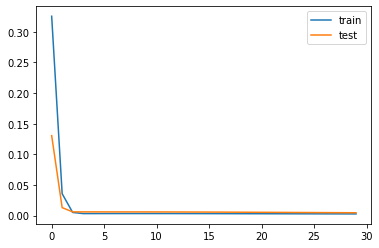

In [30]:
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# design network
model = Sequential()
model.add(LSTM(70, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[rmse])
# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=30, validation_data=(test_X, test_y), verbose=1, shuffle=False)
# plot history
pyplot.plot(history.history['rmse'], label='train')
pyplot.plot(history.history['val_rmse'], label='test')
pyplot.legend()
pyplot.show()